In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
iris=datasets.load_iris()
# 花萼长度、宽度
X_sepal=iris.data[:,[0,1]]
# 花瓣长度、宽度
X_petal=iris.data[:,[2,3]]
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [2]:
import matplotlib
matplotlib.get_data_path()

'C:\\Users\\Administrator\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\mpl-data'

In [3]:
from sklearn.model_selection import train_test_split

X_train_sepal,X_test_sepal,y_train_sepal,y_test_sepal = train_test_split(X_sepal,y,test_size=0.3,random_state=0)
print('花萼训练集形状',X_train_sepal.shape)

花萼训练集形状 (105, 2)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sepal = scaler.fit_transform(X_train_sepal)
X_test_sepal = scaler.transform(X_test_sepal)

X_combined_sepal = np.vstack((X_train_sepal,X_test_sepal))
y_combined_sepal = np.hstack((y_train_sepal,y_test_sepal))

X_combined_sepal.shape,y_combined_sepal.shape

((150, 2), (150,))

In [5]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(penalty='l2',C=0.1)
lr.fit(X_train_sepal,y_train_sepal)
score=lr.score(X_test_sepal,y_test_sepal)

print('SKlearn 逻辑回归测试准确率{:.2f}'.format(score))

SKlearn 逻辑回归测试准确率0.69


In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, test_idx=None,resolution=0.02):
    markers=('o','x','v')
    colors=('red','blue','lightgreen')
    color_map=ListedColormap(colors[:len(np.unique(y))])
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].min() + 1
    xx1,xx2= np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap=color_map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    X_test,Y_test = X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y==cl,1],
                    alpha=0.8,c=color_map(idx),
                    marker=markers[idx],label=cl)

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):    
    markers = ('o','x','v')
    colors = ('red','blue','lightgreen')
    color_Map = ListedColormap(colors[:len(np.unique(y))])     
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())   
    X_test, Y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

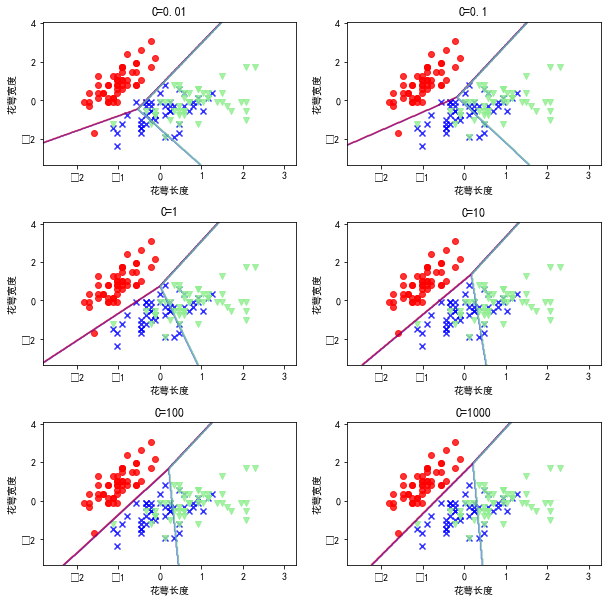

In [8]:
from sklearn.metrics import accuracy_score
C_param_range =[0.01, 0.1, 1, 10, 100, 1000]
sepal_acc_table=pd.DataFrame(columns=['C_parameter','Accuracy'])
sepal_acc_table['C_parameter']=C_param_range
plt.figure(figsize=(10,10))
j=0
for i in C_param_range:
    lr = LogisticRegression(penalty='l2',C=i,random_state=0)
    lr.fit(X_train_sepal,y_train_sepal)
    y_pred_sepal = lr.predict(X_test_sepal)
    sepal_acc_table.iloc[j,1]=accuracy_score(y_test_sepal,y_pred_sepal)
    j+=1
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace=0.4)
    plot_decision_regions(X=X_combined_sepal,y=y_combined_sepal,
                          classifier=lr,test_idx=range(0,150))
    plt.xlabel('花萼长度')
    plt.ylabel('花萼宽度')
    plt.title('C=%s'%i)